# Setup

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def reduce_data(row, amount):
  return row[::amount]

# Load Data

In [ ]:
reduce_by = 1
reduce_by1 = 10
reduce_by2 = 100
reduce_by3 = 800
reduce_by4 = 1000

### Model 0
data_x0 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_x_v0.npy')
data_y0 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_y_v0.npy')
parameters0 = np.load('/content/drive/MyDrive/Food-Web-Project/Params/0.npy')
# print("data_x0.shape:", data_x0.shape)
# print("data_y0.shape:", data_y0.shape)
data_x0 = data_x0.reshape((81, 3, 80001))
# print("\ndata_x0.shape:", data_x0.shape)
data_x0 = data_x0.transpose((0, 2, 1))

# reduce data
data_x0 = np.apply_along_axis(reduce_data, 1, data_x0, reduce_by)
data_x0_1 = np.apply_along_axis(reduce_data, 1, data_x0, reduce_by1)
data_x0_2 = np.apply_along_axis(reduce_data, 1, data_x0, reduce_by2)
data_x0_3 = np.apply_along_axis(reduce_data, 1, data_x0, reduce_by3)
data_x0_4 = np.apply_along_axis(reduce_data, 1, data_x0, reduce_by4)

print("data_x0.shape:", data_x0.shape)
print("data_y0.shape:", data_y0.shape)
print("parameters0.shape:", parameters0.shape)

### Model 1
data_x1 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_x_v1.npy')
data_y1 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_y_v1.npy')
parameters1 = np.load('/content/drive/MyDrive/Food-Web-Project/Params/1.npy')
# print("\ndata_x1.shape:", data_x1.shape)
# print("data_y1.shape:", data_y1.shape)
data_x1 = data_x1.reshape((81, 3, 80001))
# print("\ndata_x1.shape:", data_x1.shape)
data_x1 = data_x1.transpose((0, 2, 1))

# reduce data
data_x1 = np.apply_along_axis(reduce_data, 1, data_x1, reduce_by1)

print("\ndata_x1.shape:", data_x1.shape)
print("data_y1.shape:", data_y1.shape)
print("parameters1.shape:", parameters1.shape)

## Combine data
data_x = np.vstack((data_x0_1, data_x1))
# data_x = np.vstack((data_x0, data_x1))
data_y = np.vstack((data_y0, data_y1))
print("\ndata_x.shape:", data_x.shape)
print("data_y.shape:", data_y.shape)

target_values = np.unique(data_y)
print("target_values:", target_values)

print("\nhot encoding... \n")

# one-hot encoding
data_y_encoded = np.zeros((data_x.shape[0], 2))
for i in range(0, data_x.shape[0]):
  data_y_encoded[i][data_y[i*3] - 2] = 1

print("data_y_encoded.shape:", data_y.shape)
print("\nhot encoding looks like: \n", data_y_encoded[0:3])

print("\nSplitting into train and test sets... \n")

X, X_test, Y, Y_test = train_test_split(data_x, data_y_encoded, test_size=0.05)

print("X.shape:", X.shape)
print("X_test.shape:", X_test.shape)
print("Y.shape:", Y.shape)
print("Y_test.shape:", Y_test.shape)

# print("\nSome example data points:\n")

# time_frame = np.array(range(20000, 100001, reduce_by))

# fig = plt.figure(figsize=(20, 5))
# plt.subplot(1, 3, 1)
# plt.plot(time_frame, np.transpose(X[0])[0], label="Top Predator (X)")
# plt.plot(time_frame, np.transpose(X[0])[1], label="Primary consumer (C)")
# plt.plot(time_frame, np.transpose(X[0])[2], label="Primary producer (P)")
# plt.title("Label = " + str(Y[0]))

# plt.subplot(1, 3, 2)
# plt.plot(time_frame, np.transpose(X[1])[0], label="Top Predator (X)")
# plt.plot(time_frame, np.transpose(X[1])[1], label="Primary consumer (C)")
# plt.plot(time_frame, np.transpose(X[1])[2], label="Primary producer (P)")
# plt.title("Label = " + str(Y[1]))

# plt.subplot(1, 3, 3)
# plt.plot(time_frame, np.transpose(X[2])[0], label="Top Predator (X)")
# plt.plot(time_frame, np.transpose(X[2])[1], label="Primary consumer (C)")
# plt.plot(time_frame, np.transpose(X[2])[2], label="Primary producer (P)")
# plt.title("Label = " + str(Y[2]))
# plt.show()

data_x0.shape: (81, 80001, 3)
data_y0.shape: (243, 1)
parameters0.shape: (81, 2)

data_x1.shape: (81, 8001, 3)
data_y1.shape: (243, 1)
parameters1.shape: (81, 2)

data_x.shape: (162, 8001, 3)
data_y.shape: (486, 1)
target_values: [2 3]

hot encoding... 

data_y_encoded.shape: (486, 1)

hot encoding looks like: 
 [[1. 0.]
 [1. 0.]
 [1. 0.]]

Splitting into train and test sets... 

X.shape: (153, 8001, 3)
X_test.shape: (9, 8001, 3)
Y.shape: (153, 2)
Y_test.shape: (9, 2)


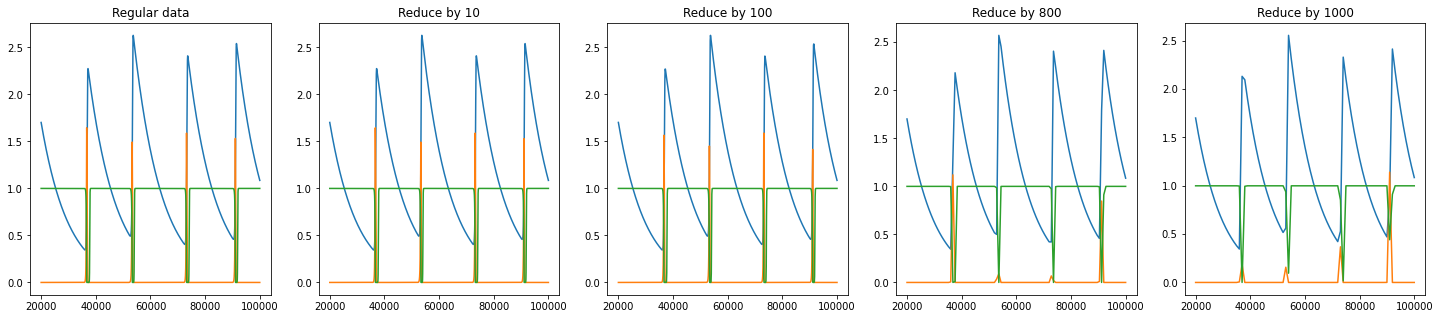

In [ ]:
fig = plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
time_frame = np.array(range(20000, 100001, reduce_by))
plt.plot(time_frame, np.transpose(data_x0[0])[0], label="Top Predator (X)")
plt.plot(time_frame, np.transpose(data_x0[0])[1], label="Primary consumer (C)")
plt.plot(time_frame, np.transpose(data_x0[0])[2], label="Primary producer (P)")
plt.title("Regular data")
# plt.show()

plt.subplot(1, 5, 2)
time_frame = np.array(range(20000, 100001, reduce_by1))
plt.plot(time_frame, np.transpose(data_x0_1[0])[0], label="Top Predator (X)")
plt.plot(time_frame, np.transpose(data_x0_1[0])[1], label="Primary consumer (C)")
plt.plot(time_frame, np.transpose(data_x0_1[0])[2], label="Primary producer (P)")
plt.title("Reduce by " + str(reduce_by1))
# plt.show()

plt.subplot(1, 5, 3)
time_frame = np.array(range(20000, 100001, reduce_by2))
plt.plot(time_frame, np.transpose(data_x0_2[0])[0], label="Top Predator (X)")
plt.plot(time_frame, np.transpose(data_x0_2[0])[1], label="Primary consumer (C)")
plt.plot(time_frame, np.transpose(data_x0_2[0])[2], label="Primary producer (P)")
plt.title("Reduce by " + str(reduce_by2))
# plt.show()

plt.subplot(1, 5, 4)
time_frame = np.array(range(20000, 100001, reduce_by3))
plt.plot(time_frame, np.transpose(data_x0_3[0])[0], label="Top Predator (X)")
plt.plot(time_frame, np.transpose(data_x0_3[0])[1], label="Primary consumer (C)")
plt.plot(time_frame, np.transpose(data_x0_3[0])[2], label="Primary producer (P)")
plt.title("Reduce by " + str(reduce_by3))
# plt.show()

plt.subplot(1, 5, 5)
time_frame = np.array(range(20000, 100001, reduce_by4))
plt.plot(time_frame, np.transpose(data_x0_4[0])[0], label="Top Predator (X)")
plt.plot(time_frame, np.transpose(data_x0_4[0])[1], label="Primary consumer (C)")
plt.plot(time_frame, np.transpose(data_x0_4[0])[2], label="Primary producer (P)")
plt.title("Reduce by " + str(reduce_by4))
plt.show()

# Define model and train

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
import keras

# define the model
model = Sequential()
model.add(Conv1D(128, 10000, padding='same', activation="relu"))
# model.add(Conv1D(32, 500, padding='same', activation="relu"))

# sanity check for dimensions
print('Shape of the output of first layer: {}'.format(model.predict_on_batch(X[0:32,:,:]).shape))

# model.add(MaxPooling1D(4))
# model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(2, activation="softmax"))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X, Y, validation_split=0.1, epochs=15)  # starts training

model.evaluate(X_test, Y_test)
model.summary()

Shape of the output of first layer: (32, 8001, 128)
Epoch 1/15
5/5 [==============================] - 10s 2s/step - loss: 0.7645 - accuracy: 0.5645 - val_loss: 0.6976 - val_accuracy: 0.5625
Epoch 2/15
5/5 [==============================] - 4s 779ms/step - loss: 0.6694 - accuracy: 0.6111 - val_loss: 0.6814 - val_accuracy: 0.5625
Epoch 3/15
5/5 [==============================] - 4s 781ms/step - loss: 0.6516 - accuracy: 0.6201 - val_loss: 0.6098 - val_accuracy: 0.5625
Epoch 4/15
5/5 [==============================] - 4s 781ms/step - loss: 0.6318 - accuracy: 0.5911 - val_loss: 0.7430 - val_accuracy: 0.4375
Epoch 5/15
5/5 [==============================] - 4s 780ms/step - loss: 0.5489 - accuracy: 0.7200 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 4s 779ms/step - loss: 0.5332 - accuracy: 0.6755 - val_loss: 1.4463 - val_accuracy: 0.3125
Epoch 7/15
5/5 [==============================] - 4s 780ms/step - loss: 0.6515 - accuracy: 0.6075 - val_loss: 

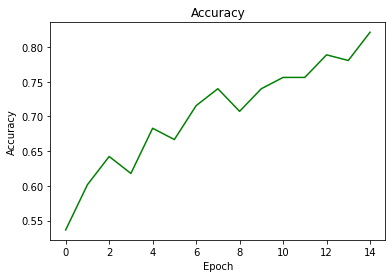

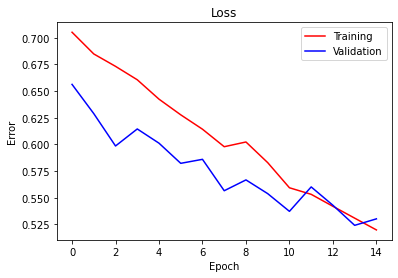

In [ ]:
accuracy = np.array(hist.history['accuracy'])
error = np.array(hist.history['loss'])

plt.plot(hist.epoch, accuracy, 'g')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.plot(hist.epoch, error, 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

# Test

In [ ]:
pred = model.predict(X_test)